# Credit card frauds

Data for this article can be found at <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">https://www.kaggle.com/mlg-ulb/creditcardfraud</a>.

There are no original independent variables in the data, but new variables are formed using principal component analysis (for both data protection and statistical reasons). The __Class__ variable is the target variable (0 = 'no fraud', 1 = 'fraud').

The number of frauds is low relative to all credit card transactions. Therefore, the data should be balanced. The imbalanced-learn library is used for balancing, which is not pre-installed in Anaconda. It can be installed, e.g., from the command line (Anaconda prompt):

 $$\textrm{conda install -c conda-forge imbalanced-learn}$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train_test_split knows how to split data into training data and test data
from sklearn.model_selection import train_test_split

# Data balancing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Models to be tested
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# To display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Review the data

In [2]:
### The data is so big that it is recommended downloading it
### to your machine before opening!

df = pd.read_csv('https://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/creditcard.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
### Distribution of the target variable

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The distribution of the values of the target variable is unbalanced.

## Balancing and model fitting

In [4]:
### Explanatory variable

X = df.drop('Class', axis=1)

##3 Target variable
y = df['Class']

# Division into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

Balancing can be done by increasing the size of a smaller group (__RandomOverSampler__). The data is big, so fitting the model takes so long that usually you have time for a coffee break.

A faster solution is to balance by reducing the size of the larger group (**RandomUnderSampler**), but this does not lead to equally good models.

In [5]:
### Balancing and model fitting

### RandomOverSampler increases the smaller group by random sampling
### You can also try RandomUnderSampler, which works faster

rs = RandomOverSampler(random_state=2)
X_train, y_train = rs.fit_resample(X_train, y_train)

lrc = LogisticRegression()
lrc.fit(X_train, y_train)

dtc = DecisionTreeClassifier(max_depth=3, random_state=2)
dtc.fit(X_train, y_train)

rfc = RandomForestClassifier(max_depth=4, random_state=2)
rfc.fit(X_train, y_train)

gbc = GradientBoostingClassifier(max_depth=2, random_state=2)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=2)

## Models assessment

In [6]:
### Proportion of correct predictions in training data

print('Accuracy of predictions in training data:')
print(f'Logistic regressio {lrc.score(X_train, y_train):.3f}')
print(f'Decision tree {dtc.score(X_train, y_train):.3f}')
print(f'Random forest {rfc.score(X_train, y_train):.3f}')
print(f'Gradient  Boosting {gbc.score(X_train, y_train):.3f}')

Accuracy of predictions in training data:
Logistic regressio 0.937
Decision tree 0.943
Random forest 0.947
Gradient  Boosting 0.973


In [7]:
### Proportion of correct predictions in test data

print('Accuracy of predictions in test data:')
print(f'Logistic regressio {lrc.score(X_test, y_test):.3f}')
print(f'Decision tree {dtc.score(X_test, y_test):.3f}')
print(f'Random forest {rfc.score(X_test, y_test):.3f}')
print(f'Gradient  Boosting {gbc.score(X_test, y_test):.3f}')

Accuracy of predictions in test data:
Logistic regressio 0.964
Decision tree 0.960
Random forest 0.993
Gradient  Boosting 0.984


In [8]:
### Forecasts given by models for test data

y_test_lrc = lrc.predict(X_test)
y_test_dtc = dtc.predict(X_test)
y_test_rfc = rfc.predict(X_test)
y_test_gbc = gbc.predict(X_test)

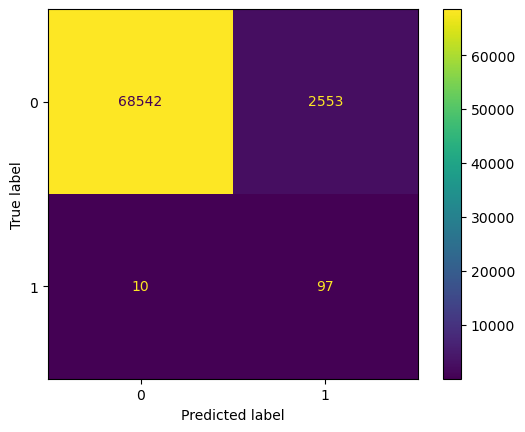

In [9]:
### Confusion matrix for logisctic regression

cm = confusion_matrix(y_test, y_test_lrc)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Logistic regression is the best at detecting fraud, but predicts a lot of OK events as fraud.

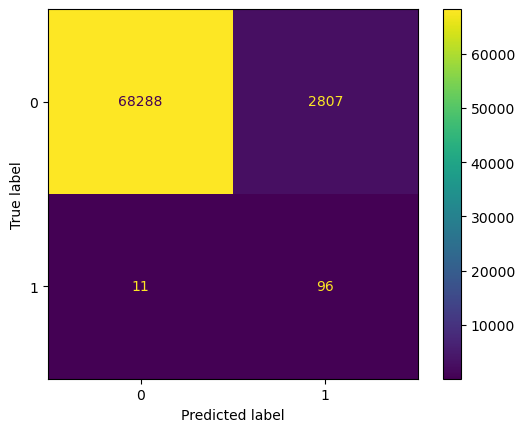

In [10]:
### Confusion matrix for decision tree

cm = confusion_matrix(y_test, y_test_dtc)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

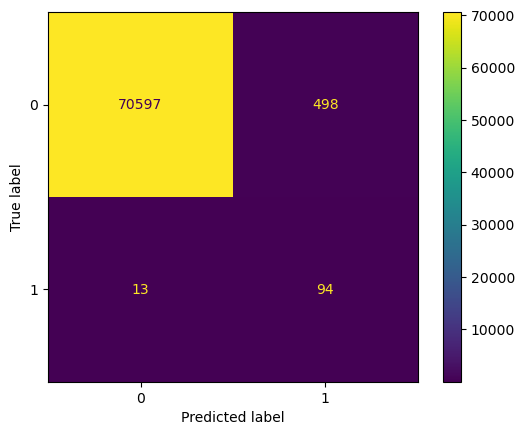

In [11]:
### Confusion matrix for random forest

cm = confusion_matrix(y_test, y_test_rfc)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

The random forest is the least likely to err on OK events, but the worst at identifying fraud.

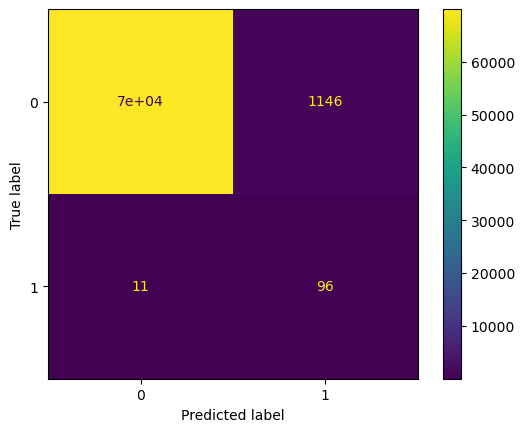

In [12]:
### Confusion matrix for gradient boosting

cm = confusion_matrix(y_test, y_test_gbc)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Gradient boosting is a good compromise between false negatives and false positives.

[Text(0.4230769230769231, 0.875, 'V14 <= -1.808\ngini = 0.5\nsamples = 426440\nvalue = [213220, 213220]'),
 Text(0.15384615384615385, 0.625, 'V4 <= -0.476\ngini = 0.063\nsamples = 192739\nvalue = [6229, 186510]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 2015\nvalue = [2015, 0]'),
 Text(0.23076923076923078, 0.375, 'V1 <= 1.992\ngini = 0.043\nsamples = 190724\nvalue = [4214, 186510]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.035\nsamples = 189908\nvalue = [3398, 186510]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 816\nvalue = [816, 0]'),
 Text(0.6923076923076923, 0.625, 'V4 <= 1.661\ngini = 0.202\nsamples = 233701\nvalue = [206991, 26710]'),
 Text(0.5384615384615384, 0.375, 'V20 <= -1.028\ngini = 0.122\nsamples = 203860\nvalue = [190556, 13304]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.5\nsamples = 5630\nvalue = [2837, 2793]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.1\nsamples = 198230\nvalue = [187719, 10511]'),
 Text(0.8461538461538461, 0.37

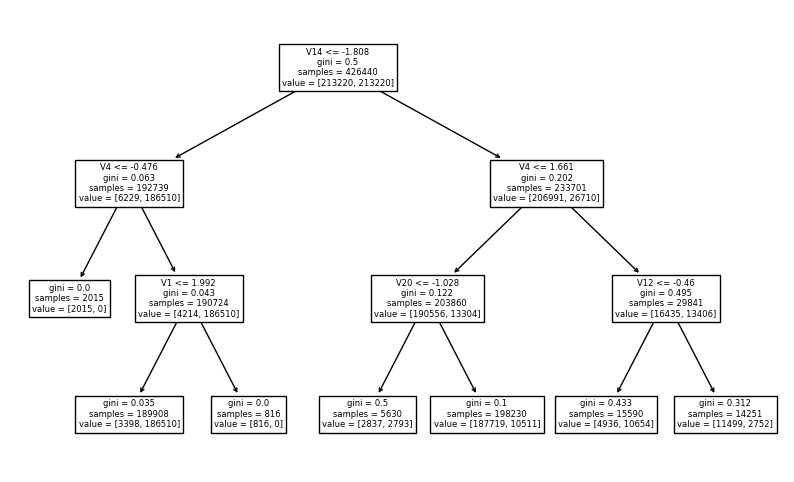

In [13]:
# The decision tree model can be illustrated as a diagram

plt.figure(figsize=(10, 6))
plot_tree(decision_tree=dtc, feature_names=X.columns)

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>.

In [14]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2023-03-20 22:24 by Juha Nurmonen
